In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
flights=pd.read_csv('/home/vaishali/projects/python_proj/Flight/flights.csv')
flights=flights.sample(n=100000)
flights.head()

/home/vaishali/projects/python_proj/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1693693,2015,4,19,7,AA,1084,N3JFAA,MIA,LGA,600,...,843.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3991452,2015,9,5,6,WN,5284,N284WN,ATL,RDU,1030,...,1138.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5250908,2015,11,25,3,AA,1566,N3LYAA,SAN,ORD,630,...,1220.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3223997,2015,7,21,2,WN,789,N916WN,LAS,SNA,650,...,744.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4401325,2015,10,1,4,WN,1307,N936WN,11278,13232,2055,...,2149.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
flights.shape

(100000, 31)

In [44]:
flights.isnull().values.any()

True

In [45]:
#Checking how many null values are there in each columns
flights.isnull().sum()

YEAR                       0
MONTH                      0
DAY                        0
DAY_OF_WEEK                0
AIRLINE                    0
FLIGHT_NUMBER              0
TAIL_NUMBER              256
ORIGIN_AIRPORT             0
DESTINATION_AIRPORT        0
SCHEDULED_DEPARTURE        0
DEPARTURE_TIME          1491
DEPARTURE_DELAY         1491
TAXI_OUT                1531
WHEELS_OFF              1531
SCHEDULED_TIME             0
ELAPSED_TIME            1809
AIR_TIME                1809
DISTANCE                   0
WHEELS_ON               1588
TAXI_IN                 1588
SCHEDULED_ARRIVAL          0
ARRIVAL_TIME            1588
ARRIVAL_DELAY           1809
DIVERTED                   0
CANCELLED                  0
CANCELLATION_REASON    98456
AIR_SYSTEM_DELAY       81716
SECURITY_DELAY         81716
AIRLINE_DELAY          81716
LATE_AIRCRAFT_DELAY    81716
WEATHER_DELAY          81716
dtype: int64

<AxesSubplot:xlabel='CANCELLATION_REASON', ylabel='count'>

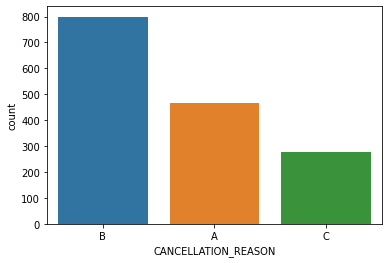

In [46]:
sns.countplot(x='CANCELLATION_REASON',data=flights)

Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security 

We can observe from graph easily that mostly weather is responsible for delays of flight.

<AxesSubplot:xlabel='MONTH', ylabel='count'>

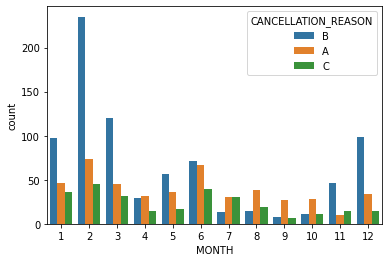

In [47]:
sns.countplot(x="MONTH",hue="CANCELLATION_REASON",data=flights)

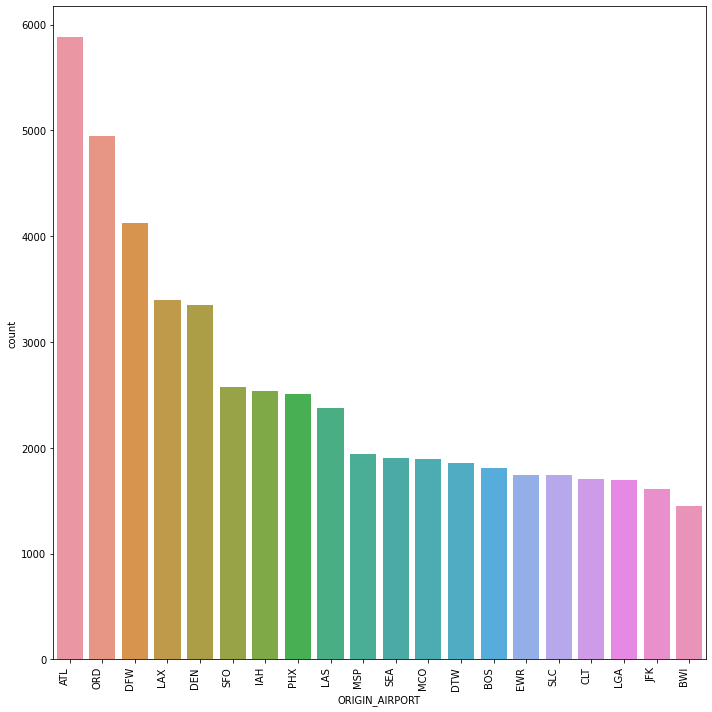

In [48]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flights['ORIGIN_AIRPORT'], data =flights, order=flights['ORIGIN_AIRPORT'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

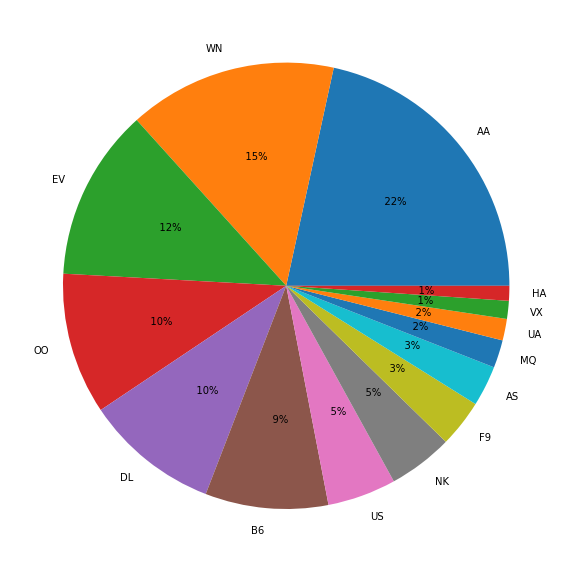

In [49]:
axis = plt.subplots(figsize=(10,14))
Name = flights["AIRLINE"].unique()
size = flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

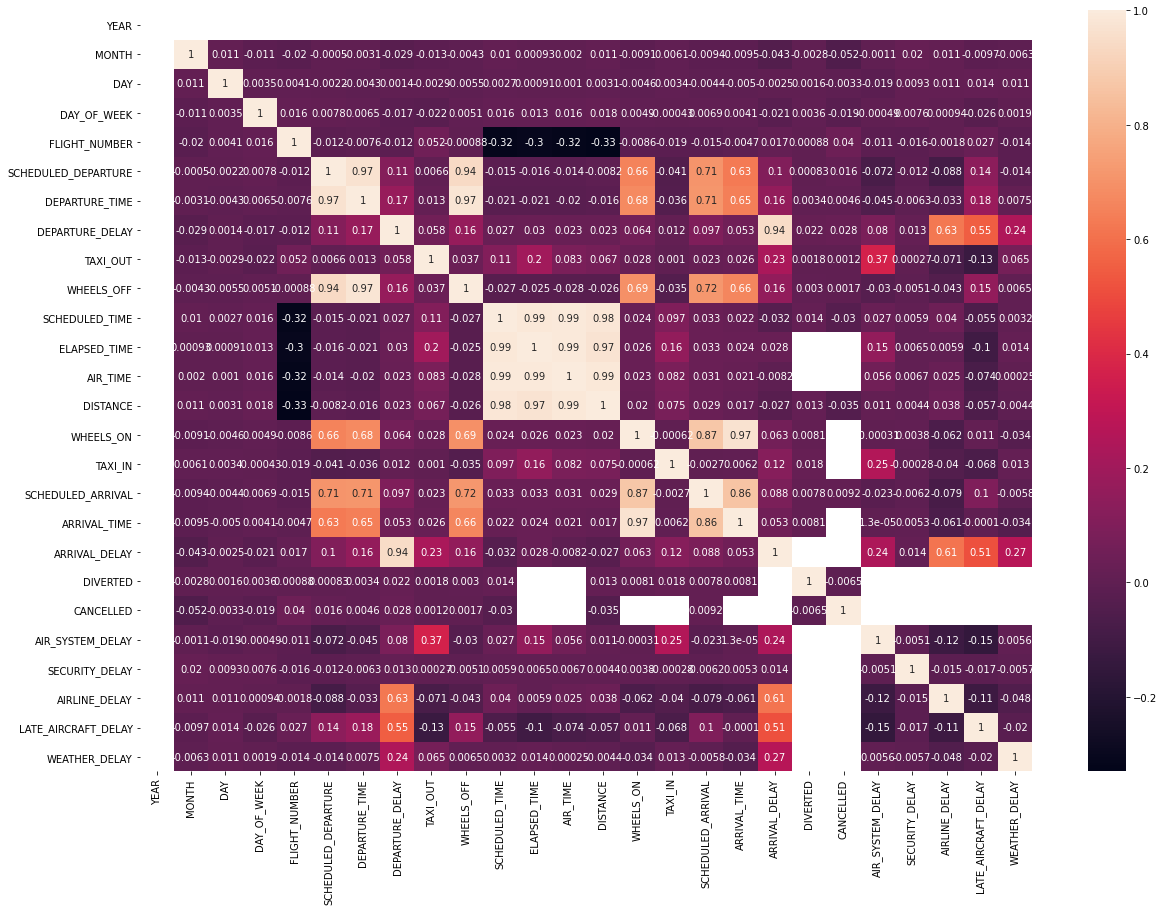

In [50]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights.corr(),annot = True)
plt.show()

Very High Correlation Between Arrival Delay and Departure Delay¶

It shows that maximum of the Arrival Delays are due to the Departure Delays.


In [51]:
corr=flights.corr()
corr

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.010724,-0.010549,-0.020241,-0.000503,-0.003121,-0.028716,-0.012574,-0.004300,...,-0.009376,-0.009515,-0.042624,-0.002808,-0.052197,-0.001139,0.019998,0.011274,-0.009685,-0.006313
DAY,NaN,0.010724,1.000000,0.003473,0.004108,-0.002234,-0.004338,0.001373,-0.002915,-0.005452,...,-0.004356,-0.004975,-0.002544,0.001599,-0.003317,-0.018735,0.009270,0.010716,0.013994,0.011447
DAY_OF_WEEK,NaN,-0.010549,0.003473,1.000000,0.015880,0.007823,0.006521,-0.016831,-0.021618,0.005110,...,0.006913,0.004145,-0.020882,0.003642,-0.019117,-0.000492,0.007627,0.000939,-0.025896,0.001853
FLIGHT_NUMBER,NaN,-0.020241,0.004108,0.015880,1.000000,-0.011652,-0.007647,-0.011715,0.052015,-0.000882,...,-0.015471,-0.004735,0.016801,0.000882,0.039705,-0.010505,-0.015506,-0.001794,0.027221,-0.013990
SCHEDULED_DEPARTURE,NaN,-0.000503,-0.002234,0.007823,-0.011652,1.000000,0.965243,0.111731,0.006567,0.942217,...,0.706600,0.627957,0.102271,0.000833,0.015927,-0.072398,-0.012238,-0.087953,0.140067,-0.014042
DEPARTURE_TIME,NaN,-0.003121,-0.004338,0.006521,-0.007647,0.965243,1.000000,0.173459,0.012956,0.974363,...,0.709897,0.646203,0.161648,0.003445,0.004601,-0.045451,-0.006277,-0.032844,0.179990,0.007461
DEPARTURE_DELAY,NaN,-0.028716,0.001373,-0.016831,-0.011715,0.111731,0.173459,1.000000,0.057528,0.163993,...,0.097392,0.052914,0.943525,0.021613,0.027637,0.080031,0.012516,0.625448,0.548555,0.243713
TAXI_OUT,NaN,-0.012574,-0.002915,-0.021618,0.052015,0.006567,0.012956,0.057528,1.000000,0.037393,...,0.022646,0.025986,0.227102,0.001848,0.001178,0.367987,0.000267,-0.070802,-0.126498,0.064659
WHEELS_OFF,NaN,-0.004300,-0.005452,0.005110,-0.000882,0.942217,0.974363,0.163993,0.037393,1.000000,...,0.718783,0.664233,0.157280,0.002977,0.001747,-0.030134,-0.005143,-0.042576,0.153363,0.006512


In [52]:
variables_to_remove=["YEAR","FLIGHT_NUMBER","TAIL_NUMBER","DEPARTURE_TIME","TAXI_OUT","WHEELS_OFF","ELAPSED_TIME","AIR_TIME","WHEELS_ON","TAXI_IN","ARRIVAL_TIME","DIVERTED","CANCELLED","CANCELLATION_REASON","AIR_SYSTEM_DELAY", "SECURITY_DELAY","AIRLINE_DELAY","LATE_AIRCRAFT_DELAY","WEATHER_DELAY","SCHEDULED_TIME","SCHEDULED_ARRIVAL"]
flights.drop(variables_to_remove,axis=1,inplace= True)
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [53]:
airport = pd.read_csv('/home/vaishali/projects/python_proj/Flight/airports.csv')
airport

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [54]:
flights.loc[~flights.ORIGIN_AIRPORT.isin(airport.IATA_CODE.values),'ORIGIN_AIRPORT']='OTHER'
flights.loc[~flights.DESTINATION_AIRPORT.isin(airport.IATA_CODE.values),'DESTINATION_AIRPORT']='OTHER'
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
1693693,4,19,7,AA,MIA,LGA,600,-2.0,1096,-13.0
3991452,9,5,6,WN,ATL,RDU,1030,-4.0,356,-12.0
5250908,11,25,3,AA,SAN,ORD,630,0.0,1723,-19.0
3223997,7,21,2,WN,LAS,SNA,650,-2.0,226,-6.0
4401325,10,1,4,WN,OTHER,OTHER,2055,-1.0,601,-11.0
...,...,...,...,...,...,...,...,...,...,...
3788281,8,23,7,WN,BNA,FLL,1855,35.0,793,35.0
1514751,4,7,2,WN,MSY,HOU,1955,-3.0,302,-15.0
2113616,5,14,4,B6,RDU,BOS,2040,-5.0,612,-11.0
1621915,4,14,2,DL,DTW,LGA,1359,-6.0,502,-13.0


In [55]:
print(flights.ORIGIN_AIRPORT.nunique())
print(flights.DESTINATION_AIRPORT.nunique())
print(flights.AIRLINE.nunique())

317
317
14


In [56]:
flights=flights.dropna()
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
1693693,4,19,7,AA,MIA,LGA,600,-2.0,1096,-13.0
3991452,9,5,6,WN,ATL,RDU,1030,-4.0,356,-12.0
5250908,11,25,3,AA,SAN,ORD,630,0.0,1723,-19.0
3223997,7,21,2,WN,LAS,SNA,650,-2.0,226,-6.0
4401325,10,1,4,WN,OTHER,OTHER,2055,-1.0,601,-11.0
...,...,...,...,...,...,...,...,...,...,...
3788281,8,23,7,WN,BNA,FLL,1855,35.0,793,35.0
1514751,4,7,2,WN,MSY,HOU,1955,-3.0,302,-15.0
2113616,5,14,4,B6,RDU,BOS,2040,-5.0,612,-11.0
1621915,4,14,2,DL,DTW,LGA,1359,-6.0,502,-13.0


In [57]:
flights.shape

(98191, 10)

In [58]:
df=pd.DataFrame(flights)
df['DAY_OF_WEEK']= df['DAY_OF_WEEK'].apply(str)
df["DAY_OF_WEEK"].replace({"1":"SUNDAY", "2": "MONDAY", "3": "TUESDAY", "4":"WEDNESDAY", "5":"THURSDAY", "6":"FRIDAY", "7":"SATURDAY"},inplace=True)
flights

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
1693693,4,19,SATURDAY,AA,MIA,LGA,600,-2.0,1096,-13.0
3991452,9,5,FRIDAY,WN,ATL,RDU,1030,-4.0,356,-12.0
5250908,11,25,TUESDAY,AA,SAN,ORD,630,0.0,1723,-19.0
3223997,7,21,MONDAY,WN,LAS,SNA,650,-2.0,226,-6.0
4401325,10,1,WEDNESDAY,WN,OTHER,OTHER,2055,-1.0,601,-11.0
...,...,...,...,...,...,...,...,...,...,...
3788281,8,23,SATURDAY,WN,BNA,FLL,1855,35.0,793,35.0
1514751,4,7,MONDAY,WN,MSY,HOU,1955,-3.0,302,-15.0
2113616,5,14,WEDNESDAY,B6,RDU,BOS,2040,-5.0,612,-11.0
1621915,4,14,MONDAY,DL,DTW,LGA,1359,-6.0,502,-13.0


In [59]:
dums = ['AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DAY_OF_WEEK']
df_cat=pd.get_dummies(df[dums],drop_first=True)
df_cat

,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
1693693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3991452,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5250908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3223997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4401325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1514751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2113616,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1621915,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
df_cat.columns

Index(['AIRLINE_AS', 'AIRLINE_B6', 'AIRLINE_DL', 'AIRLINE_EV', 'AIRLINE_F9',
       'AIRLINE_HA', 'AIRLINE_MQ', 'AIRLINE_NK', 'AIRLINE_OO', 'AIRLINE_UA',
       ...
       'DESTINATION_AIRPORT_WYS', 'DESTINATION_AIRPORT_XNA',
       'DESTINATION_AIRPORT_YAK', 'DESTINATION_AIRPORT_YUM',
       'DAY_OF_WEEK_MONDAY', 'DAY_OF_WEEK_SATURDAY', 'DAY_OF_WEEK_SUNDAY',
       'DAY_OF_WEEK_THURSDAY', 'DAY_OF_WEEK_TUESDAY', 'DAY_OF_WEEK_WEDNESDAY'],
      dtype='object', length=650)

In [61]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [62]:
flights.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'DISTANCE', 'ARRIVAL_DELAY'],
      dtype='object')

In [63]:
var_to_remove=["DAY_OF_WEEK","AIRLINE","ORIGIN_AIRPORT","DESTINATION_AIRPORT"]
df.drop(var_to_remove,axis=1,inplace=True)
df

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY
1693693,4,19,600,-2.0,1096,-13.0
3991452,9,5,1030,-4.0,356,-12.0
5250908,11,25,630,0.0,1723,-19.0
3223997,7,21,650,-2.0,226,-6.0
4401325,10,1,2055,-1.0,601,-11.0
...,...,...,...,...,...,...
3788281,8,23,1855,35.0,793,35.0
1514751,4,7,1955,-3.0,302,-15.0
2113616,5,14,2040,-5.0,612,-11.0
1621915,4,14,1359,-6.0,502,-13.0


In [64]:
data=pd.concat([df,df_cat],axis=1)
data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
1693693,4,19,600,-2.0,1096,-13.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3991452,9,5,1030,-4.0,356,-12.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5250908,11,25,630,0.0,1723,-19.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3223997,7,21,650,-2.0,226,-6.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4401325,10,1,2055,-1.0,601,-11.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788281,8,23,1855,35.0,793,35.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1514751,4,7,1955,-3.0,302,-15.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2113616,5,14,2040,-5.0,612,-11.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1621915,4,14,1359,-6.0,502,-13.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [65]:
data.shape

(98191, 656)

In [66]:
final_data = data.sample(n=60000)
final_data

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
577121,2,8,910,-2.0,122,-7.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2658235,6,17,910,-1.0,147,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4597048,10,14,1107,-5.0,2139,-32.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1006549,3,7,1645,3.0,612,-14.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4380519,9,30,1623,-12.0,312,-20.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065566,3,11,1041,-10.0,1167,-14.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2176889,5,18,2020,21.0,624,6.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
234804,1,16,830,-7.0,1874,-19.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3506864,8,6,1730,33.0,636,51.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
final_data.shape

(60000, 656)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [69]:
X=final_data.drop("DEPARTURE_DELAY",axis=1)
Y=final_data.DEPARTURE_DELAY

In [70]:
X

,MONTH,DAY,SCHEDULED_DEPARTURE,DISTANCE,ARRIVAL_DELAY,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,...,DESTINATION_AIRPORT_WYS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK,DESTINATION_AIRPORT_YUM,DAY_OF_WEEK_MONDAY,DAY_OF_WEEK_SATURDAY,DAY_OF_WEEK_SUNDAY,DAY_OF_WEEK_THURSDAY,DAY_OF_WEEK_TUESDAY,DAY_OF_WEEK_WEDNESDAY
577121,2,8,910,122,-7.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2658235,6,17,910,147,4.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4597048,10,14,1107,2139,-32.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1006549,3,7,1645,612,-14.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4380519,9,30,1623,312,-20.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065566,3,11,1041,1167,-14.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2176889,5,18,2020,624,6.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
234804,1,16,830,1874,-19.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3506864,8,6,1730,636,51.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [71]:
Y

577121     -2.0
2658235    -1.0
4597048    -5.0
1006549     3.0
4380519   -12.0
           ... 
1065566   -10.0
2176889    21.0
234804     -7.0
3506864    33.0
2704458    87.0
Name: DEPARTURE_DELAY, Length: 60000, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [73]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [74]:
y_pred = reg_rf.predict(X_test)

In [75]:
reg_rf.score(X_train,y_train)

0.9884818959758286

In [76]:
reg_rf.score(X_test,y_test)

0.9143046822068708

In [77]:
metrics.r2_score(y_test,y_pred)

0.9143046822068708

In [78]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 6.005734166666667
MSE: 99.68190620833333
RMSE: 9.984082642302864


In [79]:
pp=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pp

,Actual,Predicted
2326353,18.0,15.89
2006403,1.0,-0.52
5116259,-2.0,-2.48
2851245,-4.0,-5.44
2057114,0.0,3.57
...,...,...
5105254,-2.0,2.81
1629340,-1.0,-0.85
3941088,-5.0,-1.78
2016798,16.0,17.25


In [80]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [81]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [82]:
# Random search of parameters, using 5 fold cross validation,search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [83]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=148; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  12.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=182; total time=  13.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 27, 44, 61, 79, 96,
                                                         113, 130, 148, 165,
                                                         182, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [84]:
rf_random.best_params_

{'n_estimators': 61,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [85]:
p=rf_random.predict(X_test)

In [86]:
metrics.r2_score(y_test,p)

0.9171972819335971

In [87]:
print('MAE:', metrics.mean_absolute_error(y_test,p))
print('MSE:', metrics.mean_squared_error(y_test,p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,p)))

MAE: 5.951928247098012
MSE: 96.31719665262763
RMSE: 9.814132496182616


In [88]:
zz=pd.DataFrame({'Actual':y_test,'Predicted':p})
zz

,Actual,Predicted
2326353,18.0,9.729463
2006403,1.0,-0.998347
5116259,-2.0,-2.434197
2851245,-4.0,-3.912472
2057114,0.0,3.295185
...,...,...
5105254,-2.0,2.940617
1629340,-1.0,-0.302423
3941088,-5.0,-0.188904
2016798,16.0,16.656880


In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(random_state=0)

In [90]:
GBR=gbr.fit(X_train,y_train)
pre=GBR.predict(X_test)

In [91]:
print('MAE:', metrics.mean_absolute_error(y_test,pre))
print('MSE:', metrics.mean_squared_error(y_test,pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pre)))

MAE: 5.951467554134106
MSE: 94.04817902627855
RMSE: 9.697844040109047


In [92]:
metrics.r2_score(y_test,pre)

0.9191479286854941

In [93]:
gg=pd.DataFrame({'Actual':y_test,'Predicted':pre})
gg

,Actual,Predicted
2326353,18.0,9.228779
2006403,1.0,-0.672365
5116259,-2.0,-1.286391
2851245,-4.0,-3.533372
2057114,0.0,2.957000
...,...,...
5105254,-2.0,1.647247
1629340,-1.0,-0.538003
3941088,-5.0,-0.977484
2016798,16.0,17.111717


In [94]:
def predict(MONTH, DAY,SCHEDULED_DEPARTURE,DISTANCE, ARRIVAL_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DAY_OF_WEEK):
    AIRLINE_index = np.where(X.columns==AIRLINE)[0][0]
    ORIGIN_index = np.where(X.columns==ORIGIN_AIRPORT)[0][0]
    DESTINATION_index = np.where(X.columns==DESTINATION_AIRPORT)[0][0]
    DAY_OF_WEEK_index = np.where(X.columns==DAY_OF_WEEK)[0][0]
    x= np.zeros(len(X.columns))
    x[0] = MONTH
    x[1] = DAY
    x[2] = SCHEDULED_DEPARTURE
    x[3] = DISTANCE
    x[4] = ARRIVAL_DELAY
    if AIRLINE_index >=0:
        x[AIRLINE_index] = 1
    if ORIGIN_index >=0:
        x[ORIGIN_index] = 1
    if DESTINATION_index >=0:
        x[DESTINATION_index] = 1
    if  DAY_OF_WEEK_index >= 0:
        x[ DAY_OF_WEEK_index] = 1

    return gbr.predict([x])[0]

In [95]:
res= predict(5,6,1515,328,-8.0,'AIRLINE_OO','ORIGIN_AIRPORT_PHX','DESTINATION_AIRPORT_ABQ','DAY_OF_WEEK_TUESDAY')
res

-4.2462992756768605

In [96]:
if(res<=-15):
  print("Flight is delayed")
else:
  print("Flight is not delayed")

Flight is not delayed
